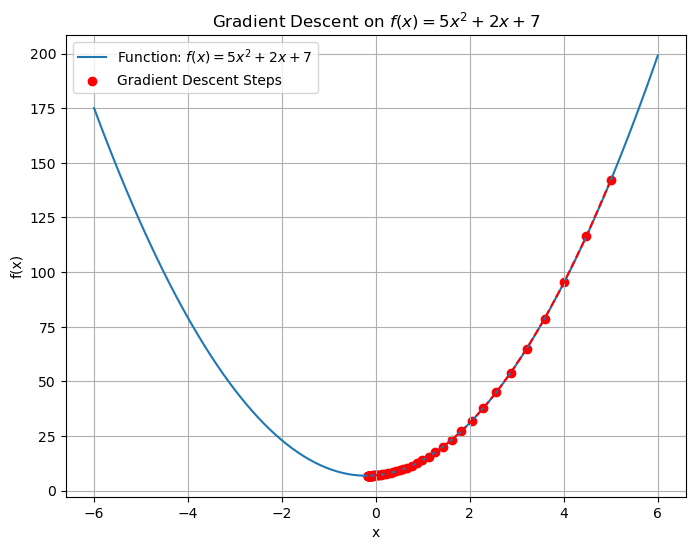

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return 5 * (x ** 2) + 2 * x + 7

def gradient(x):
    return 10 * x + 2

def gradient_descent(starting_x, learning_rate, iterations):
    x = starting_x
    history = [x]
    
    for _ in range(iterations):
        grad = gradient(x)
        x -= learning_rate * grad
        history.append(x)
    
    return history

starting_x = 5
learning_rate = 0.01
iterations = 50

history = gradient_descent(starting_x, learning_rate, iterations)

x_vals = np.linspace(-6, 6, 400)
y_vals = function(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Function: $f(x) = 5x^2 + 2x + 7$')
plt.scatter(history, function(np.array(history)), color='red', label='Gradient Descent Steps')
plt.plot(history, function(np.array(history)), linestyle='dashed', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on $f(x) = 5x^2 + 2x + 7$')
plt.legend()
plt.grid()
plt.show()


Dataset downloaded successfully!
Mean Squared Error: 559.0317lly!

R-squared Score: -0.1683


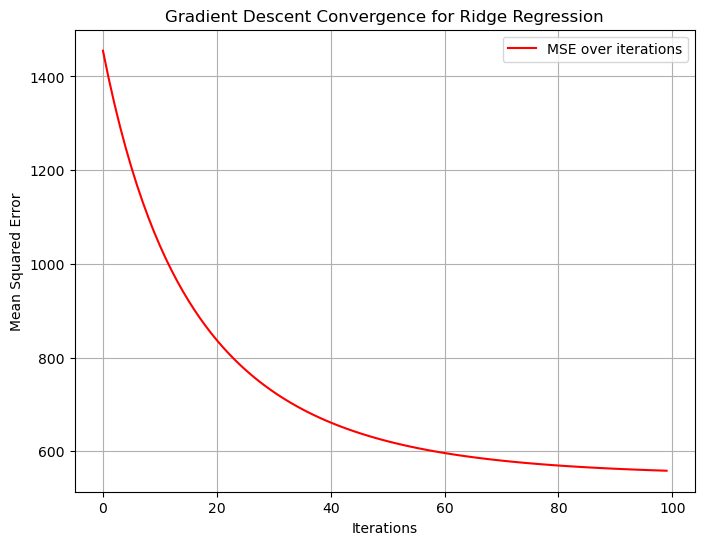

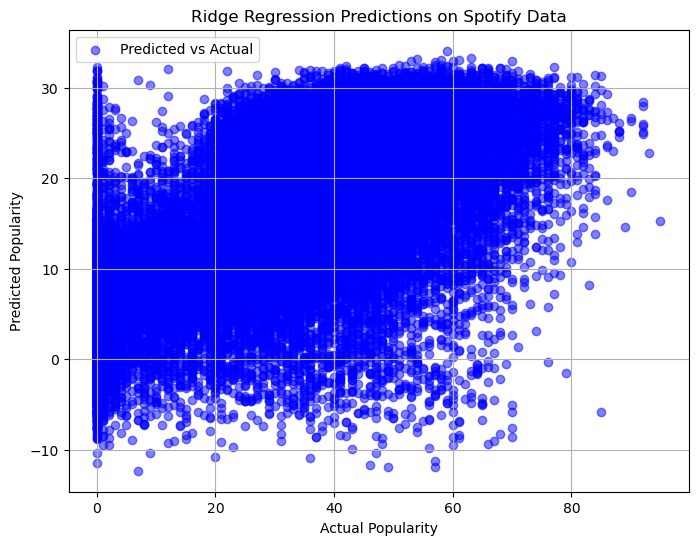

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import kagglehub
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def download_data():
    print("Downloading dataset...")
    path = kagglehub.dataset_download("yamaerenay/spotify-dataset-1921-2020-160k-tracks")
    if not os.path.exists('data.csv'):
        for root, dirs, files in os.walk(path):
            if 'data.csv' in files:
                import shutil
                shutil.copy2(os.path.join(root, 'data.csv'), 'data.csv')
                break
    if os.path.exists('data.csv'):
        print("Dataset downloaded successfully!")
        return pd.read_csv('data.csv')
    else:
        raise FileNotFoundError("data.csv not found after download.")

df = download_data()

features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
target = 'popularity'

df = df.dropna(subset=features + [target])
X = df[features].values
y = df[target].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class RidgeGradientDescent:
    def __init__(self, learning_rate=0.01, iterations=100, alpha=1.0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha
        self.theta = None
    
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.random.randn(X_b.shape[1], 1)
        history = []
        
        for _ in range(self.iterations):
            gradients = 2 / X_b.shape[0] * X_b.T @ (X_b @ self.theta - y) + 2 * self.alpha * self.theta
            self.theta -= self.learning_rate * gradients
            history.append(mean_squared_error(y, X_b @ self.theta))
        
        return history
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

ridge_gd = RidgeGradientDescent(learning_rate=0.01, iterations=100, alpha=1.0)
history = ridge_gd.fit(X_train, y_train)
y_pred = ridge_gd.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared Score: {r2:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(range(len(history)), history, label='MSE over iterations', color='red')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Ridge Regression Predictions on Spotify Data')
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install --force-reinstall kagglehub